#Przegląd

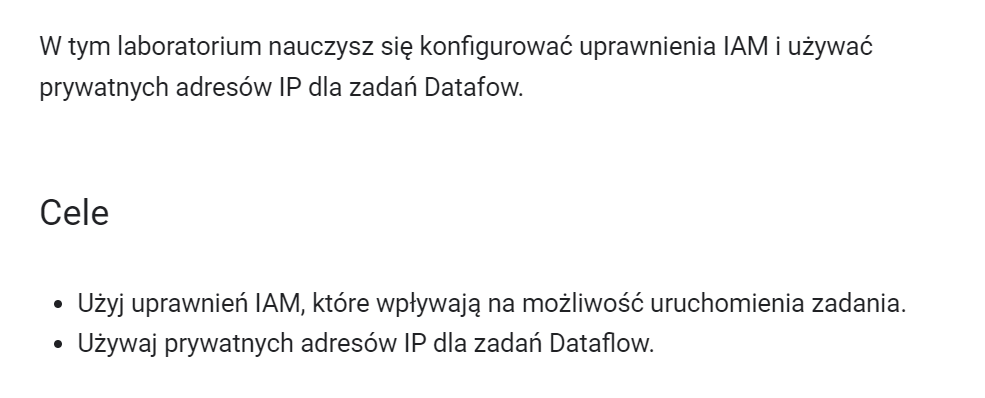

#Zadanie 1. Utwórz segment Cloud Storage

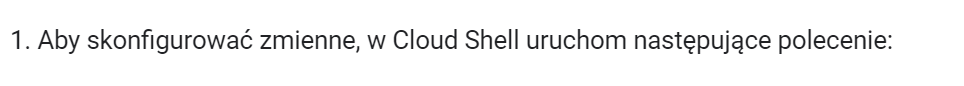

In [ ]:
PROJECT=`gcloud config list --format 'value(core.project)'`
USER_EMAIL=`gcloud config list account --format "value(core.account)"`
REGION=us-central1

In [ ]:
echo $PROJECT

In [ ]:
echo $USER_EMAIL

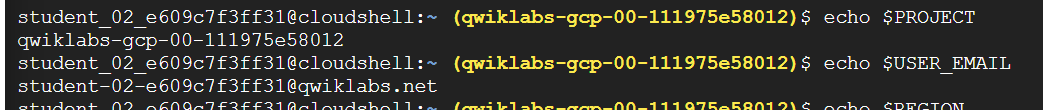

In [ ]:
echo $REGION

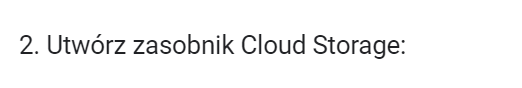

In [ ]:
gsutil mb -p $PROJECT -b on gs://$PROJECT

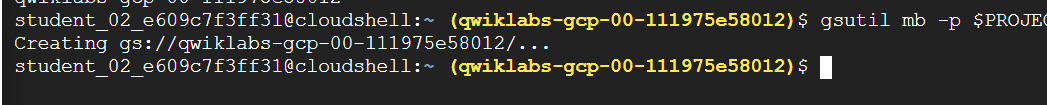

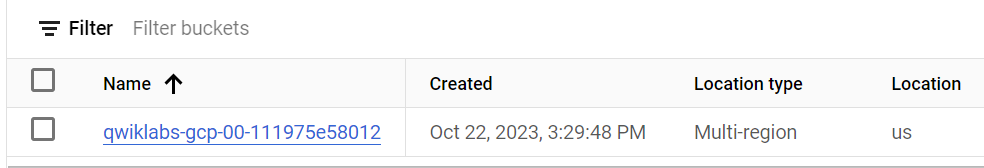

#Zadanie 2. Uruchom zadanie Dataflow

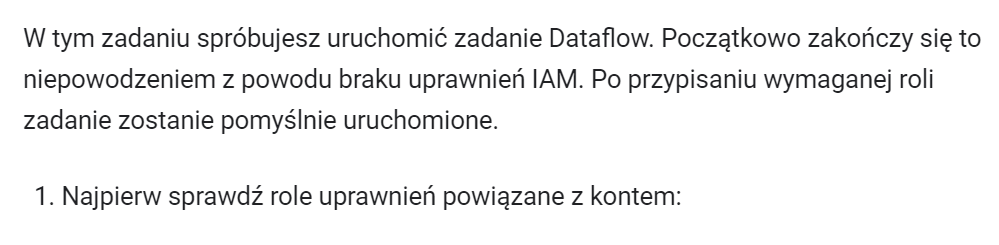

In [ ]:
gcloud projects get-iam-policy $PROJECT  \
--format='table(bindings.role)' \
--flatten="bindings[].members" \
--filter="bindings.members:$USER_EMAIL"

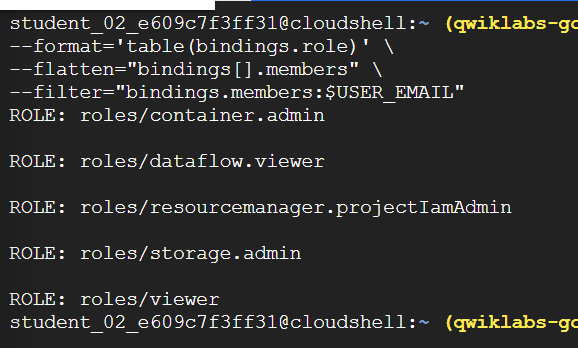

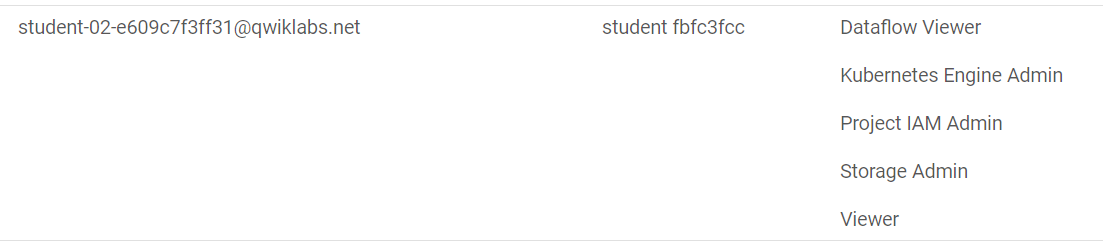

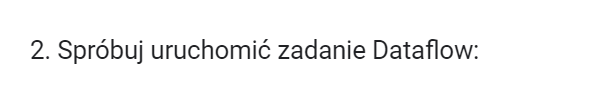

In [ ]:
gcloud dataflow jobs run job1 \
--gcs-location gs://dataflow-templates-us-central1/latest/Word_Count \
--region $REGION \
--staging-location gs://$PROJECT/tmp \
--parameters inputFile=gs://dataflow-samples/shakespeare/kinglear.txt,output=gs://$PROJECT/results/outputs

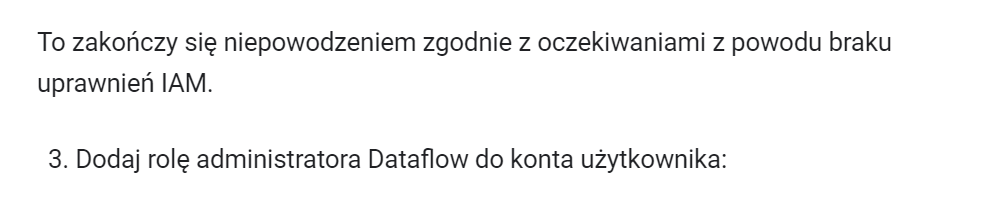

In [ ]:
gcloud projects add-iam-policy-binding $PROJECT --member=user:$USER_EMAIL --role=roles/dataflow.admin

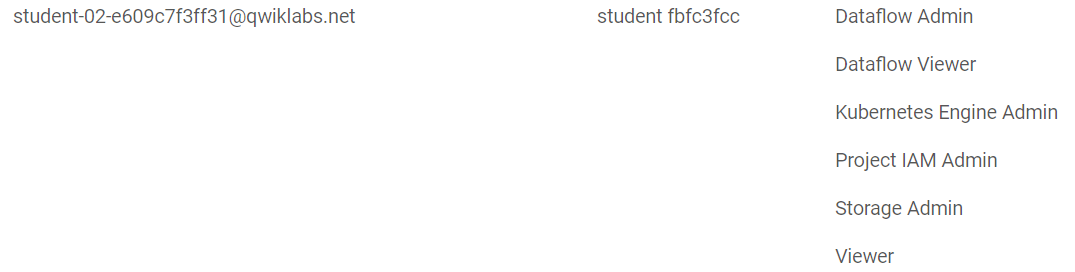

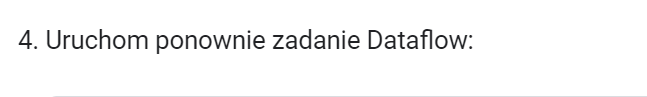

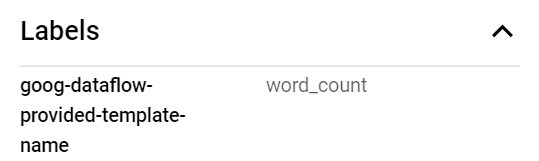

In [ ]:
gcloud dataflow jobs run job1 \
--gcs-location gs://dataflow-templates-us-central1/latest/Word_Count \
--region $REGION \
--staging-location gs://$PROJECT/tmp \
--parameters inputFile=gs://dataflow-samples/shakespeare/kinglear.txt,output=gs://$PROJECT/results/outputs

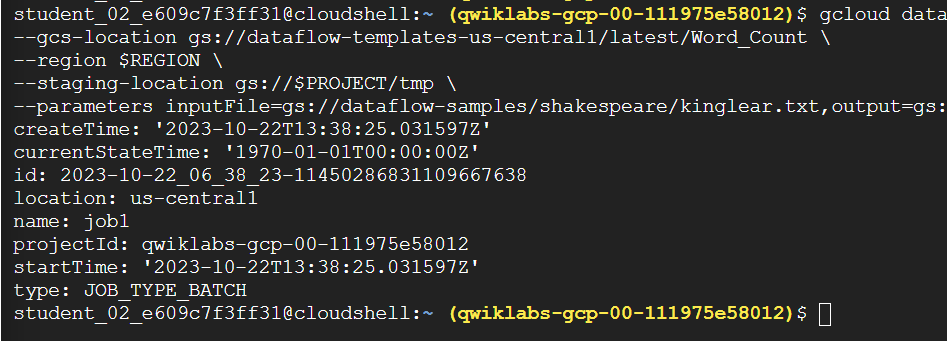

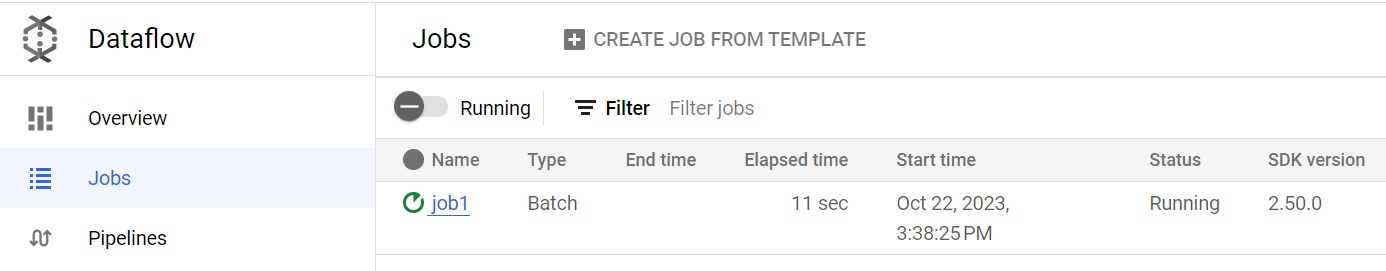

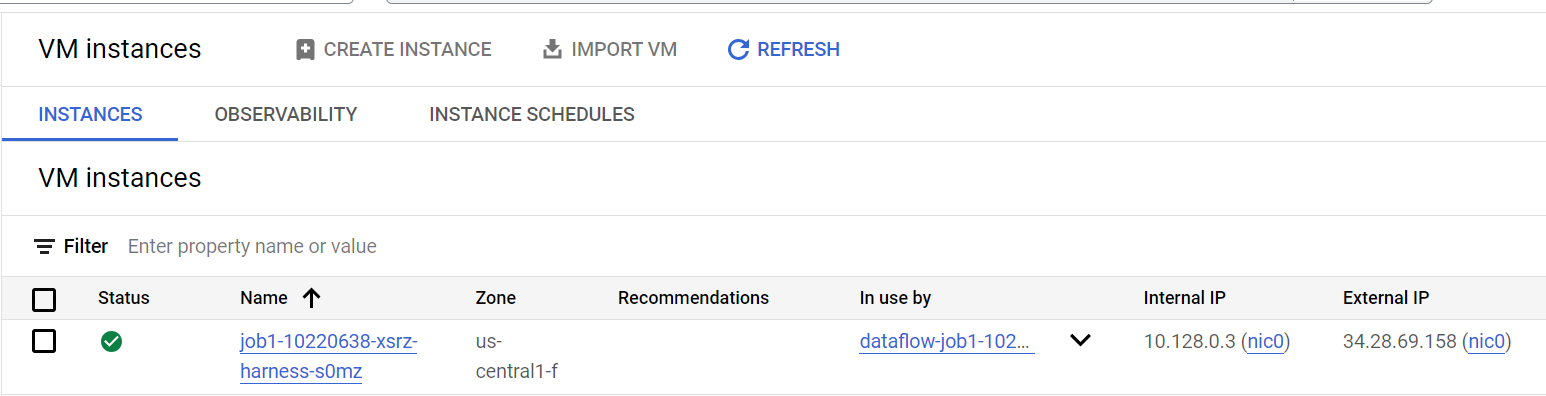

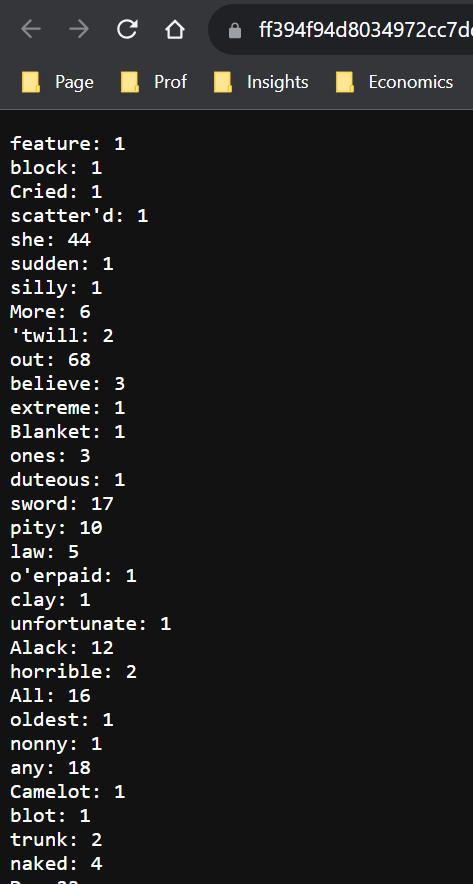

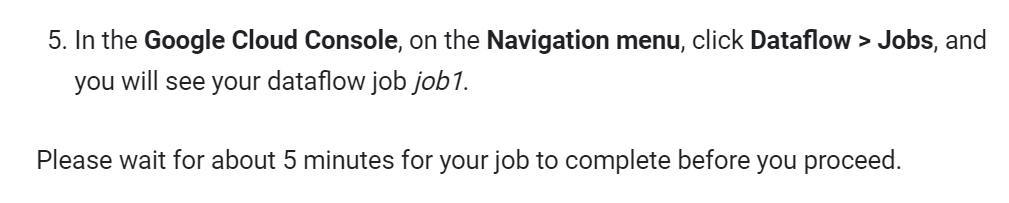

#Zadanie 3. Uruchom w prywatnych adresach IP

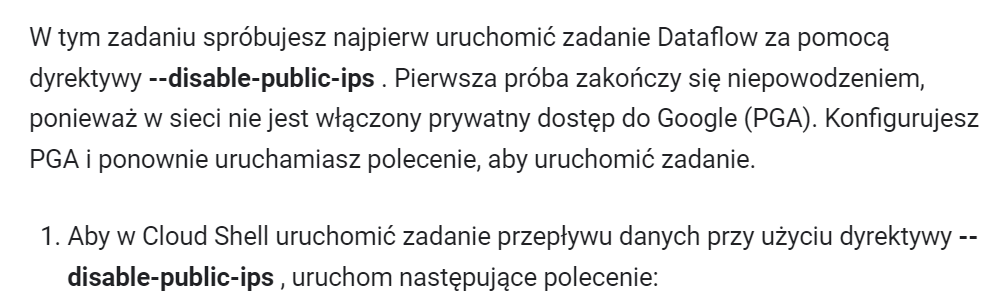

In [ ]:
gcloud dataflow jobs run job2 \
--gcs-location gs://dataflow-templates-us-central1/latest/Word_Count \
--region $REGION \
--staging-location gs://$PROJECT/tmp \
--parameters inputFile=gs://dataflow-samples/shakespeare/kinglear.txt,output=gs://$PROJECT/results/outputs --disable-public-ips

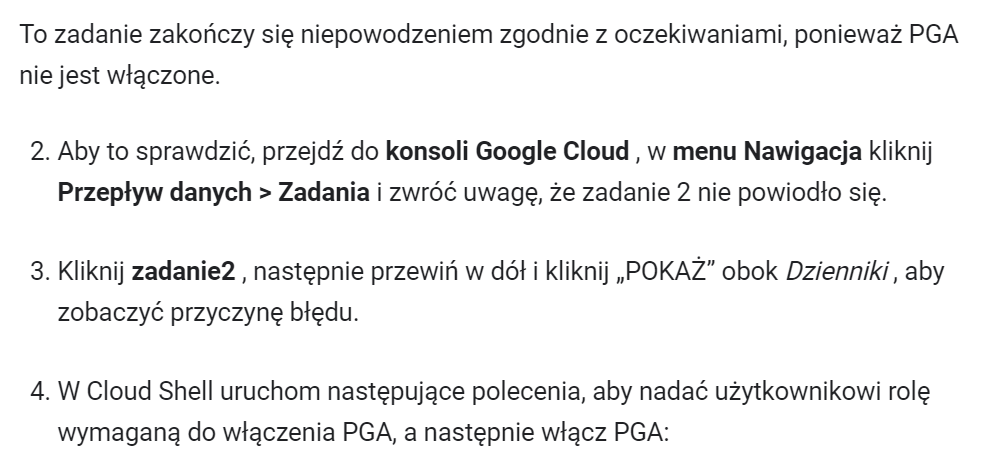

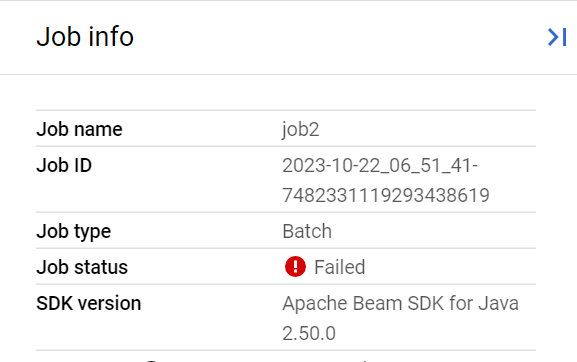

In [ ]:
gcloud projects add-iam-policy-binding $PROJECT --member=user:$USER_EMAIL --role=roles/compute.networkAdmin
gcloud compute networks subnets update default \
--region=$REGION \
--enable-private-ip-google-access

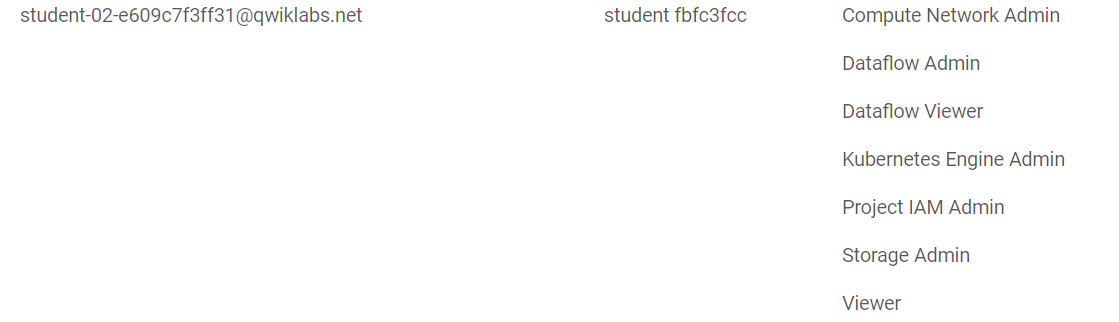

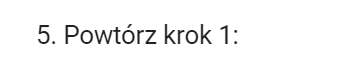

In [ ]:
gcloud dataflow jobs run job2 \
--gcs-location gs://dataflow-templates-"REGION"/latest/Word_Count \
--region $REGION \
--staging-location gs://$PROJECT/tmp \
--parameters inputFile=gs://dataflow-samples/shakespeare/kinglear.txt,output=gs://$PROJECT/results/outputs --disable-public-ips

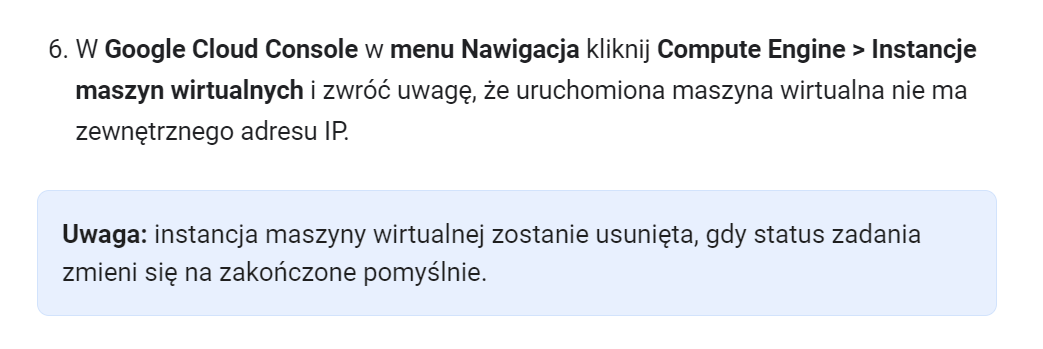

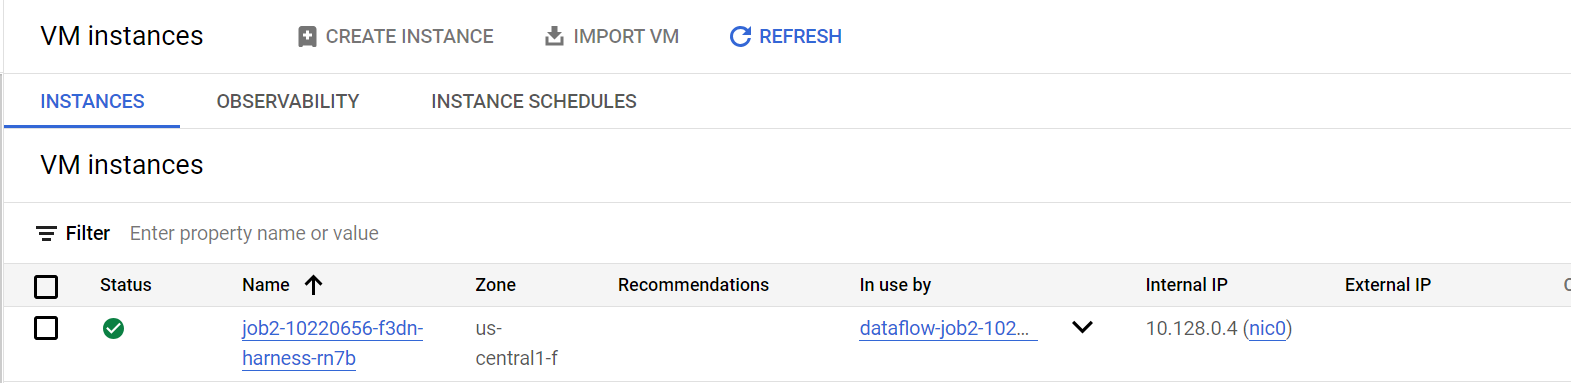

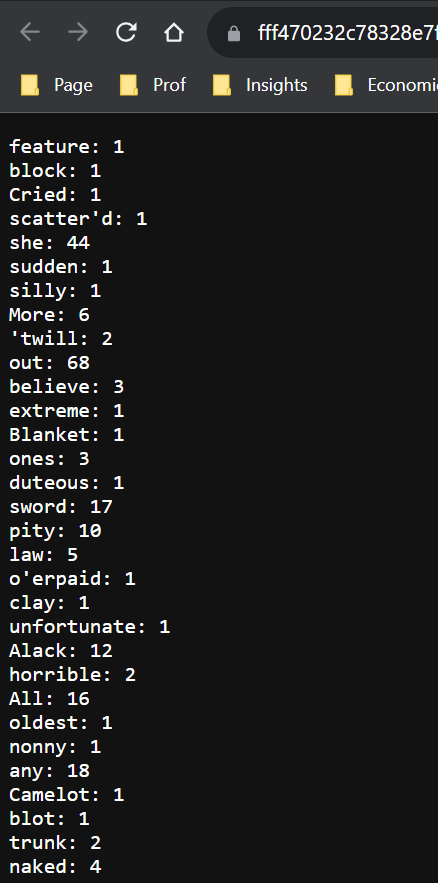

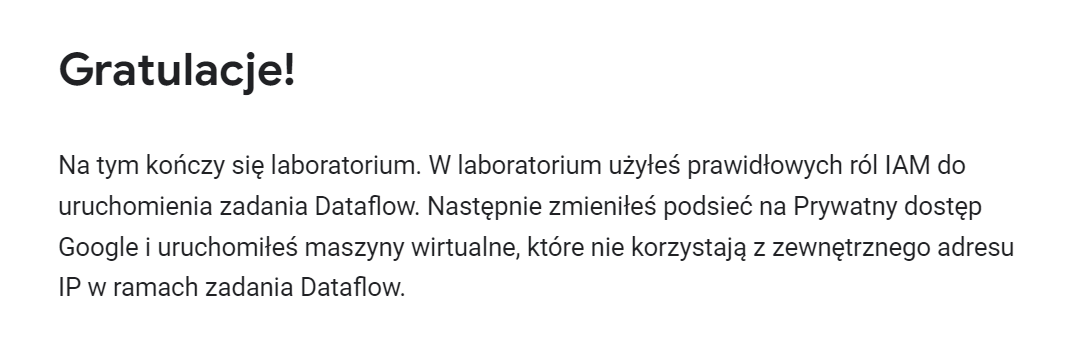